<a href="https://colab.research.google.com/github/eferna71/Back-Testing-Strategy/blob/main/tadingstratMACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#description: MACD crossover strat to decide when to buy and sell a stock

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#load data
from google.colab import files
uploaded = files.upload()

Saving AC.TO.csv to AC.TO.csv


In [6]:
#create dataframe
df = pd.read_csv('AC.TO.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-18,2019-11-18,49.290001,49.720001,48.950001,49.560001,49.560001,986147.0
2019-11-19,2019-11-19,49.560001,50.119999,49.299999,49.880001,49.880001,1059311.0
2019-11-20,2019-11-20,49.700001,50.119999,49.360001,49.750000,49.750000,781474.0
2019-11-21,2019-11-21,49.750000,50.040001,49.439999,49.450001,49.450001,697568.0
2019-11-22,2019-11-22,49.459999,49.680000,48.959999,49.169998,49.169998,591529.0
...,...,...,...,...,...,...,...
2020-11-10,2020-11-10,19.590000,20.500000,18.870001,20.120001,20.120001,9867015.0
2020-11-11,2020-11-11,19.980000,20.379999,19.110001,19.219999,19.219999,6208847.0
2020-11-12,2020-11-12,18.900000,19.129999,18.490000,18.570000,18.570000,5061099.0
2020-11-13,2020-11-13,18.570000,19.490000,18.570000,19.410000,19.410000,4379590.0


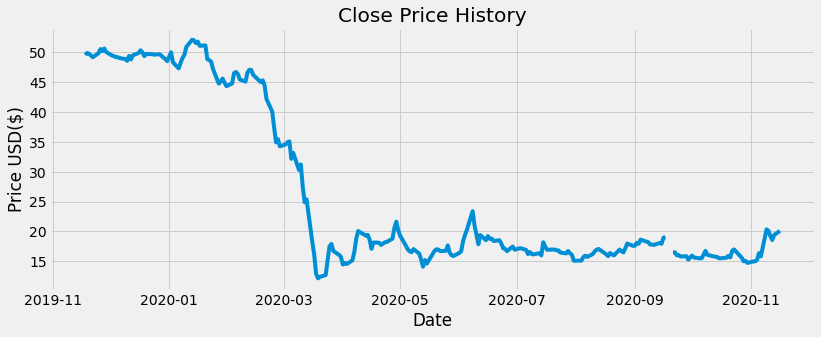

In [10]:
#visualize
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label= 'Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD($)')
plt.show()


In [12]:
#Calculate signal line and (EMA)

ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()


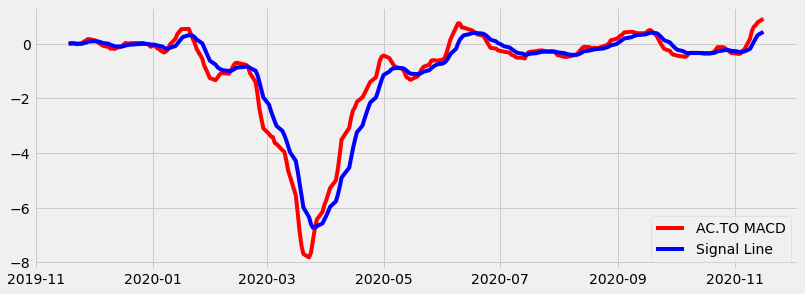

In [15]:
#plot the signal line vs MACD

plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AC.TO MACD', color='red')
plt.plot(df.index, signal, label = 'Signal Line', color='blue')
plt.legend(loc='lower right')
plt.show()

In [16]:
df['MACD'] = MACD
df['Signal Line'] = signal

df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2019-11-18,2019-11-18,49.290001,49.720001,48.950001,49.560001,49.560001,986147.0,0.000000,0.000000
2019-11-19,2019-11-19,49.560001,50.119999,49.299999,49.880001,49.880001,1059311.0,0.025527,0.005105
2019-11-20,2019-11-20,49.700001,50.119999,49.360001,49.750000,49.750000,781474.0,0.034866,0.011057
2019-11-21,2019-11-21,49.750000,50.040001,49.439999,49.450001,49.450001,697568.0,0.017853,0.012417
2019-11-22,2019-11-22,49.459999,49.680000,48.959999,49.169998,49.169998,591529.0,-0.018016,0.006330
...,...,...,...,...,...,...,...,...,...
2020-11-10,2020-11-10,19.590000,20.500000,18.870001,20.120001,20.120001,9867015.0,0.472441,-0.055607
2020-11-11,2020-11-11,19.980000,20.379999,19.110001,19.219999,19.219999,6208847.0,0.622419,0.079998
2020-11-12,2020-11-12,18.900000,19.129999,18.490000,18.570000,18.570000,5061099.0,0.680978,0.200194
2020-11-13,2020-11-13,18.570000,19.490000,18.570000,19.410000,19.410000,4379590.0,0.786106,0.317377


In [19]:
#Create function of when to buy and sell

def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
       



In [20]:
a= buy_sell(df)
df["Buy_Signal_Price"] = a[0]
df["Sell_Signal_Price"] = a[1]

In [21]:
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2019-11-18,2019-11-18,49.290001,49.720001,48.950001,49.560001,49.560001,986147.0,0.000000,0.000000,NaN,NaN
2019-11-19,2019-11-19,49.560001,50.119999,49.299999,49.880001,49.880001,1059311.0,0.025527,0.005105,49.880001,NaN
2019-11-20,2019-11-20,49.700001,50.119999,49.360001,49.750000,49.750000,781474.0,0.034866,0.011057,NaN,NaN
2019-11-21,2019-11-21,49.750000,50.040001,49.439999,49.450001,49.450001,697568.0,0.017853,0.012417,NaN,NaN
2019-11-22,2019-11-22,49.459999,49.680000,48.959999,49.169998,49.169998,591529.0,-0.018016,0.006330,NaN,49.169998
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2020-11-10,19.590000,20.500000,18.870001,20.120001,20.120001,9867015.0,0.472441,-0.055607,NaN,NaN
2020-11-11,2020-11-11,19.980000,20.379999,19.110001,19.219999,19.219999,6208847.0,0.622419,0.079998,NaN,NaN
2020-11-12,2020-11-12,18.900000,19.129999,18.490000,18.570000,18.570000,5061099.0,0.680978,0.200194,NaN,NaN
2020-11-13,2020-11-13,18.570000,19.490000,18.570000,19.410000,19.410000,4379590.0,0.786106,0.317377,NaN,NaN


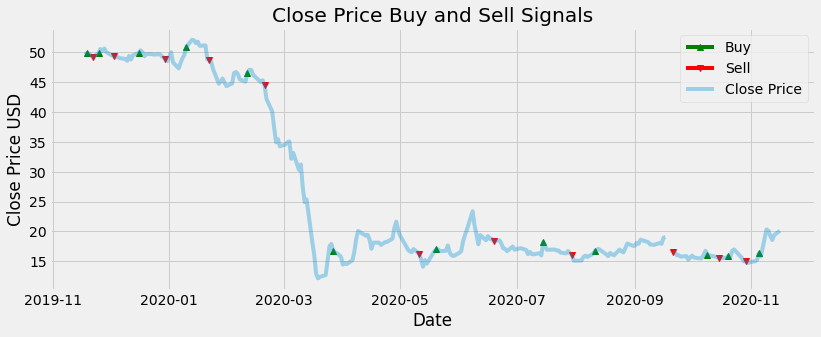

In [25]:
#Visualize
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.plot(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha= 0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper right')
plt.show()